In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_24.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4761,34.0970,20.2,282.0,2022-10-31 01:44:32.801828,2022-10-30 16:41:25,2022-10-30 01:55:08,under way using engine,235.557924,529.149365
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4315,34.1047,20.2,282.0,2022-10-31 01:49:35.660712,2022-10-30 16:48:08,2022-10-30 01:55:08,under way using engine,238.931185,536.726944
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3895,34.1077,20.2,271.0,2022-10-31 01:54:38.504486,2022-10-30 16:54:25,2022-10-30 01:55:08,under way using engine,242.321724,544.343338
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3598,34.1082,20.1,271.0,2022-10-31 01:59:42.326869,2022-10-30 16:58:50,2022-10-30 01:55:08,under way using engine,244.800071,545.915560
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3213,34.1087,20.2,271.0,2022-10-31 02:04:44.283430,2022-10-30 17:04:31,2022-10-30 01:55:08,under way using engine,248.026798,557.159024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8247,35.0773,0.0,91.0,2022-11-04 20:13:03.886599,2022-11-04 11:09:51,2022-11-04 11:07:05,under way using engine,11.985248,NaN
474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8246,35.0772,0.0,91.0,2022-11-04 20:18:07.878970,2022-11-04 11:15:24,2022-11-04 11:07:05,under way using engine,11.973778,NaN
475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0774,0.1,91.0,2022-11-04 20:58:30.521894,2022-11-04 11:57:20,2022-11-04 11:49:08,under way using engine,11.997099,957.274033
476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0775,0.0,91.0,2022-11-04 21:03:31.914746,2022-11-04 12:00:35,2022-11-04 12:01:08,under way using engine,12.008209,NaN


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

167


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1389.7275616339807

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

69.48637808169903

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016
21.03415675050134


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.141176470588237
1 14.822222222222223
2 13.670000000000002
3 13.4
4 14.338095238095239
5 13.54375
6 13.335714285714285
7 12.75
8 12.31111111111111
9 11.855263157894736
10 13.41111111111111
11 12.399999999999999
12 12.51388888888889
13 8.313157894736841
14 4.645


In [19]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-11-02 09:18:39.641081
부산 도착 시각 2022-11-04 21:18:40.519903


In [20]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


282


In [21]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [22]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [23]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [24]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,282,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.8688,38.9578,12.4,100.0,2022-11-12 23:02:38.554501,2022-11-12 14:00:34,2022-11-12 01:55:09,under way using engine,1068.260054,1432.668366
1,283,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9026,38.9531,12.7,101.0,2022-11-12 23:12:44.814106,2022-11-12 14:08:21,2022-11-12 02:07:07,under way using engine,1065.345788,1448.963869
2,284,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9384,38.9479,14.5,99.0,2022-11-12 23:17:47.161732,2022-11-12 14:15:47,2022-11-12 02:07:07,under way using engine,1062.250502,1597.874275
3,285,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9789,38.9423,14.8,102.0,2022-11-12 23:27:54.327480,2022-11-12 14:23:39,2022-11-12 02:25:09,under way using engine,1058.760673,1623.040180
4,286,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.0179,38.9360,14.7,100.0,2022-11-12 23:32:55.565163,2022-11-12 14:31:10,2022-11-12 02:25:09,under way using engine,1055.363820,1607.577829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610
202,484,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8261,35.0755,1.4,76.0,2022-11-14 16:00:40.036669,2022-11-14 06:58:29,2022-11-14 06:49:08,under way using engine,11.791119,67.307567
203,485,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,35.0774,0.0,90.0,2022-11-14 16:41:02.521600,2022-11-14 07:39:30,2022-11-14 07:37:07,moored,12.021023,NaN
204,486,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8293,35.0774,0.1,91.0,2022-11-14 17:26:27.030687,2022-11-14 08:24:24,2022-11-14 08:25:09,moored,12.020340,959.128537


In [25]:
stop_index = check_ATA(sample)

In [26]:
stop_index

191

In [27]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
191,473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8439,34.9249,8.4,342.0,2022-11-14 14:29:52.786142,2022-11-14 05:26:54,2022-11-14 05:25:07,under way using engine,5.447127,6.918124
192,474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8385,34.9384,8.0,333.0,2022-11-14 14:34:55.619701,2022-11-14 05:33:11,2022-11-14 05:25:07,under way using engine,3.879457,4.995893
193,475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8344,34.9461,7.6,333.0,2022-11-14 14:39:57.920027,2022-11-14 05:36:59,2022-11-14 05:25:07,under way using engine,2.946936,3.866274
194,476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,34.9557,6.9,333.0,2022-11-14 14:45:02.905957,2022-11-14 05:42:05,2022-11-14 05:43:07,under way using engine,1.791940,2.459299
195,477,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8198,34.9731,6.3,331.0,2022-11-14 14:55:12.993020,2022-11-14 05:52:30,2022-11-14 05:49:06,under way using engine,0.390487,0.564887
196,478,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8152,34.9809,6.7,331.0,2022-11-14 15:10:11.327193,2022-11-14 05:57:15,2022-11-14 05:49:06,under way using engine,1.314820,1.833649
197,479,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7966,35.0150,11.7,340.0,2022-11-14 15:15:12.495454,2022-11-14 06:12:15,2022-11-14 06:13:06,under way using engine,5.460545,7.115526
198,480,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7919,35.0257,13.1,340.0,2022-11-14 15:20:16.097459,2022-11-14 06:15:32,2022-11-14 06:13:06,under way using engine,6.723890,9.330926
199,481,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7848,35.0622,8.5,9.0,2022-11-14 15:30:21.387551,2022-11-14 06:27:23,2022-11-14 06:25:07,under way using engine,10.769332,13.639817
200,482,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7970,35.0721,6.5,90.0,2022-11-14 15:40:27.289966,2022-11-14 06:35:51,2022-11-14 06:25:07,under way using engine,11.579390,16.434245


In [28]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-14 14:29:52.786142')

# 감속률 적용

In [29]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [30]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-15 01:51:26.635679,2022-11-14 14:29:52.786142,0 days 11:21:33.849537
21,303,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,1781.483085,2022-11-15 01:39:30.128433,2022-11-14 14:29:52.786142,0 days 11:09:37.342291
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-14 22:55:43.911342,2022-11-14 14:29:52.786142,0 days 08:25:51.125200
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-15 00:57:51.759385,2022-11-14 14:29:52.786142,0 days 10:27:58.973243
24,306,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,1433.439883,2022-11-14 23:48:54.628622,2022-11-14 14:29:52.786142,0 days 09:19:01.842480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,468,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8490,34.8331,12.0,5.0,2022-11-14 13:54:32.294131,2022-11-14 04:51:50,2022-11-14 04:49:06,under way using engine,15.415500,20.322095,2022-11-14 17:15:32.294131,2022-11-14 14:29:52.786142,0 days 02:45:39.507989
187,469,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8507,34.8480,10.0,5.0,2022-11-14 13:59:34.961439,2022-11-14 04:56:33,2022-11-14 04:55:08,under way using engine,13.818333,17.295579,2022-11-14 18:00:34.961439,2022-11-14 14:29:52.786142,0 days 03:30:42.175297
188,470,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8499,34.8694,9.5,357.0,2022-11-14 14:09:41.042274,2022-11-14 05:04:39,2022-11-14 04:55:08,under way using engine,11.482433,14.346133,2022-11-14 18:22:41.042274,2022-11-14 14:29:52.786142,0 days 03:52:48.256132
189,471,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8500,34.8889,9.6,5.0,2022-11-14 14:14:44.537214,2022-11-14 05:12:12,2022-11-14 04:55:08,under way using engine,9.395706,11.738199,2022-11-14 18:24:44.537214,2022-11-14 14:29:52.786142,0 days 03:54:51.751072


In [31]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [32]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [33]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [34]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [35]:
ddd["error"].max()

Timedelta('0 days 11:21:33.849537')

In [36]:
ddd["error"].mean()

Timedelta('0 days 01:55:15.584691730')

In [37]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
51,333,COSCO FOS,KRBNP,2022-11-14 06:00:00,122.8769,37.7407,19.6,123.0,2022-11-13 13:40:53.367368,2022-11-13 04:36:21,2022-11-13 04:19:45,under way using engine,614.745948,2022-11-14 14:28:53.367368,2022-11-14 14:29:52.786142,0 days 00:00:59.418774,0 days 08:29:52.786142
67,349,COSCO FOS,KRBNP,2022-11-14 06:00:00,124.8260,34.8874,19.2,156.0,2022-11-13 23:56:39.399569,2022-11-13 14:56:24,2022-11-13 06:03:53,under way using engine,364.154141,2022-11-14 14:28:39.399569,2022-11-14 14:29:52.786142,0 days 00:01:13.386573,0 days 08:29:52.786142
54,336,COSCO FOS,KRBNP,2022-11-14 06:00:00,123.0270,37.6025,20.1,142.0,2022-11-13 14:16:13.292393,2022-11-13 05:12:23,2022-11-13 05:01:59,under way using engine,595.868965,2022-11-14 14:28:13.292393,2022-11-14 14:29:52.786142,0 days 00:01:39.493749,0 days 08:29:52.786142
122,404,COSCO FOS,KRBNP,2022-11-14 06:00:00,127.1296,34.0894,19.3,86.0,2022-11-14 07:25:51.619083,2022-11-13 22:25:06,2022-11-13 06:03:53,under way using engine,183.141868,2022-11-14 14:27:51.619083,2022-11-14 14:29:52.786142,0 days 00:02:01.167059,0 days 08:29:52.786142
123,405,COSCO FOS,KRBNP,2022-11-14 06:00:00,127.1656,34.0913,19.3,85.0,2022-11-14 07:30:54.397605,2022-11-13 22:30:41,2022-11-13 06:03:53,under way using engine,180.247245,2022-11-14 14:32:54.397605,2022-11-14 14:29:52.786142,0 days 00:03:01.611463,0 days 08:29:52.786142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,309,COSCO FOS,KRBNP,2022-11-14 06:00:00,120.5667,38.6206,16.5,100.0,2022-11-13 07:02:09.203419,2022-11-12 21:59:29,2022-11-12 09:55:08,under way using engine,839.043729,2022-11-14 23:29:09.203419,2022-11-14 14:29:52.786142,0 days 08:59:16.417277,0 days 08:29:52.786142
24,306,COSCO FOS,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,2022-11-14 23:48:54.628622,2022-11-14 14:29:52.786142,0 days 09:19:01.842480,0 days 08:29:52.786142
23,305,COSCO FOS,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,2022-11-15 00:57:51.759385,2022-11-14 14:29:52.786142,0 days 10:27:58.973243,0 days 08:29:52.786142
21,303,COSCO FOS,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,2022-11-15 01:39:30.128433,2022-11-14 14:29:52.786142,0 days 11:09:37.342291,0 days 08:29:52.786142


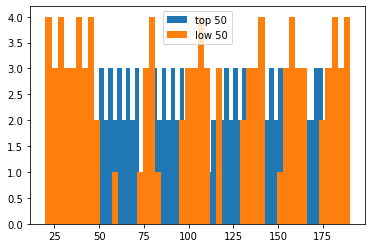

In [38]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [39]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       377
speed                                      18.2
timestamp            2022-11-14 02:17:58.845116
ETA                  2022-11-14 15:04:58.845116
error                    0 days 00:35:06.058974
remained_distance                    333.952053
Name: 95, dtype: object

In [40]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       328
speed                                      18.9
timestamp            2022-11-13 12:45:22.153779
ETA                  2022-11-14 16:24:22.153779
error                    0 days 01:54:29.367637
remained_distance                    647.035778
Name: 46, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [41]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


282


In [42]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [43]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [44]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [45]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,282,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.8688,38.9578,12.4,100.0,2022-11-12 23:02:38.554501,2022-11-12 14:00:34,2022-11-12 01:55:09,under way using engine,1068.260054,1432.668366
1,283,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9026,38.9531,12.7,101.0,2022-11-12 23:12:44.814106,2022-11-12 14:08:21,2022-11-12 02:07:07,under way using engine,1065.345788,1448.963869
2,284,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9384,38.9479,14.5,99.0,2022-11-12 23:17:47.161732,2022-11-12 14:15:47,2022-11-12 02:07:07,under way using engine,1062.250502,1597.874275
3,285,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,117.9789,38.9423,14.8,102.0,2022-11-12 23:27:54.327480,2022-11-12 14:23:39,2022-11-12 02:25:09,under way using engine,1058.760673,1623.040180
4,286,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.0179,38.9360,14.7,100.0,2022-11-12 23:32:55.565163,2022-11-12 14:31:10,2022-11-12 02:25:09,under way using engine,1055.363820,1607.577829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610
202,484,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8261,35.0755,1.4,76.0,2022-11-14 16:00:40.036669,2022-11-14 06:58:29,2022-11-14 06:49:08,under way using engine,11.791119,67.307567
203,485,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,35.0774,0.0,90.0,2022-11-14 16:41:02.521600,2022-11-14 07:39:30,2022-11-14 07:37:07,moored,12.021023,NaN
204,486,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8293,35.0774,0.1,91.0,2022-11-14 17:26:27.030687,2022-11-14 08:24:24,2022-11-14 08:25:09,moored,12.020340,959.128537


In [46]:
stop_index = check_ATA(sample)

In [47]:
stop_index

191

In [48]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
191,473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8439,34.9249,8.4,342.0,2022-11-14 14:29:52.786142,2022-11-14 05:26:54,2022-11-14 05:25:07,under way using engine,5.447127,6.918124
192,474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8385,34.9384,8.0,333.0,2022-11-14 14:34:55.619701,2022-11-14 05:33:11,2022-11-14 05:25:07,under way using engine,3.879457,4.995893
193,475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8344,34.9461,7.6,333.0,2022-11-14 14:39:57.920027,2022-11-14 05:36:59,2022-11-14 05:25:07,under way using engine,2.946936,3.866274
194,476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,34.9557,6.9,333.0,2022-11-14 14:45:02.905957,2022-11-14 05:42:05,2022-11-14 05:43:07,under way using engine,1.791940,2.459299
195,477,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8198,34.9731,6.3,331.0,2022-11-14 14:55:12.993020,2022-11-14 05:52:30,2022-11-14 05:49:06,under way using engine,0.390487,0.564887
196,478,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8152,34.9809,6.7,331.0,2022-11-14 15:10:11.327193,2022-11-14 05:57:15,2022-11-14 05:49:06,under way using engine,1.314820,1.833649
197,479,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7966,35.0150,11.7,340.0,2022-11-14 15:15:12.495454,2022-11-14 06:12:15,2022-11-14 06:13:06,under way using engine,5.460545,7.115526
198,480,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7919,35.0257,13.1,340.0,2022-11-14 15:20:16.097459,2022-11-14 06:15:32,2022-11-14 06:13:06,under way using engine,6.723890,9.330926
199,481,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7848,35.0622,8.5,9.0,2022-11-14 15:30:21.387551,2022-11-14 06:27:23,2022-11-14 06:25:07,under way using engine,10.769332,13.639817
200,482,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7970,35.0721,6.5,90.0,2022-11-14 15:40:27.289966,2022-11-14 06:35:51,2022-11-14 06:25:07,under way using engine,11.579390,16.434245


In [49]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-14 14:29:52.786142')

In [50]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [51]:
ddd = sample.loc[20:,:]


In [52]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd.sort_values(by="error")

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
167,449,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,128.5057,34.4472,15.7,55.0,2022-11-14 11:28:10.400430,2022-11-14 02:26:42,2022-11-14 02:25:04,under way using engine,64.782380,105.375171,2022-11-14 16:17:10.400430,2022-11-14 14:29:52.786142,0 days 01:47:17.614288
168,450,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,128.5275,34.4605,14.0,55.0,2022-11-14 11:33:12.818811,2022-11-14 02:32:10,2022-11-14 02:25:04,under way using engine,62.583458,91.323856,2022-11-14 16:22:12.818811,2022-11-14 14:29:52.786142,0 days 01:52:20.032669
169,451,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,128.5564,34.4783,13.6,55.0,2022-11-14 11:43:19.139505,2022-11-14 02:39:51,2022-11-14 02:37:06,under way using engine,59.685810,85.106329,2022-11-14 16:32:19.139505,2022-11-14 14:29:52.786142,0 days 02:02:26.353363
170,452,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,128.5815,34.4940,13.8,55.0,2022-11-14 11:48:21.850001,2022-11-14 02:46:49,2022-11-14 02:37:06,under way using engine,57.180242,82.469142,2022-11-14 16:37:21.850001,2022-11-14 14:29:52.786142,0 days 02:07:29.063859
171,453,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,128.5977,34.5038,13.8,55.0,2022-11-14 11:53:24.589522,2022-11-14 02:51:06,2022-11-14 02:49:07,under way using engine,55.617194,80.214810,2022-11-14 16:42:24.589522,2022-11-14 14:29:52.786142,0 days 02:12:31.803380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,319,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,121.1511,38.4547,18.9,110.0,2022-11-13 08:43:05.809628,2022-11-12 23:38:11,2022-11-12 11:37:09,under way using engine,785.357252,1604.414790,2022-11-15 07:17:05.809628,2022-11-14 14:29:52.786142,0 days 16:47:13.023486
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-15 07:43:43.911342,2022-11-14 14:29:52.786142,0 days 17:13:51.125200
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-15 07:58:51.759385,2022-11-14 14:29:52.786142,0 days 17:28:58.973243
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-15 09:50:26.635679,2022-11-14 14:29:52.786142,0 days 19:20:33.849537


In [53]:
ddd['error'].mean()

Timedelta('0 days 07:43:26.876316725')

In [54]:
ddd['error'].max()

Timedelta('0 days 19:25:37.342291')

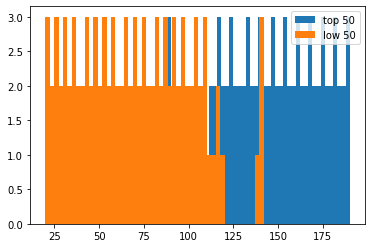

In [55]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [56]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       410
speed                                      18.9
timestamp            2022-11-14 07:56:08.493670
ETA                  2022-11-14 18:53:08.493670
error                    0 days 04:23:15.707528
remained_distance                    166.956563
Name: 128, dtype: object

In [57]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       387
speed                                      18.1
timestamp            2022-11-14 03:13:29.942991
ETA                  2022-11-14 22:52:29.942991
error                    0 days 08:22:37.156849
remained_distance                     315.78182
Name: 105, dtype: object